# <center>House Prices</center>
With explanatory variables describing (almost) every aspect of residential homes in Ames, lowa. Using this dataset predict the final price of each home.

In [35]:
# Code for showing toggle button for showing/hiding the code
from IPython.display import HTML,Image,display
HTML('''
<script>
code_show=true;
function code_toggle(){
if (code_show){
$('div.input').hide();
$("#btn_toggle").val("Show Code");
}else{
$('div.input').show();
$("#btn_toggle").val("Hide Code");
}
code_show= !code_show;
}
</script>
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    }
</style>
<form action="javascript:code_toggle()">
<input style = "float:right" type="submit" id="btn_toggle" value="Hide Code">
''')


In [9]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [10]:
#Visualization settings
sns.set_style(style='white')
sns.set(rc={
    'figure.figsize': (12,7),
    'axes.facecolor': 'white',
    'axes.grid': True,
    'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},
    font_scale=1.5)
custom_colors=["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

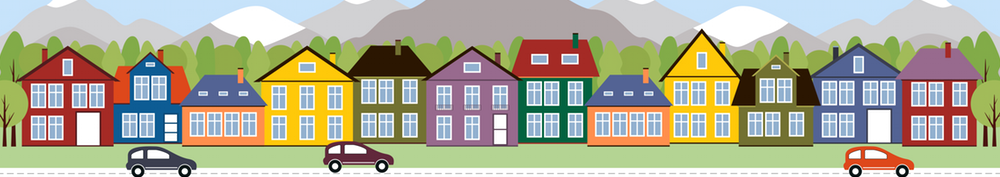

In [12]:
Image('housesbanner.png')

In [17]:
df_train=pd.read_csv('train.csv')
print ("Training data loaded")

Training data loaded


## <center>Dataset description</center>

In [18]:
print ("Sample dataframe:\n")
df_train.head(3)

Sample dataframe:



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [22]:
print (f"Initial data frame contains {df_train.shape[0]} rows and {df_train.shape[1]} columns.")

Initial data frame contains 1460 rows and 81 columns.


In [101]:
col_tags ="<ol>" + "".join([f"<li><h4>{col}</h4></li>" for col in df_train.columns]) + "</ol>"
display(HTML('<h3>Feature names:</h3>'))
display(HTML(col_tags))

In [103]:
print ("Dataset information :\n")
df_train.info()

Dataset information :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null 

<h3 style='background-color:yellow'>
    3 float columns <br>
    35 integer columns <br>
    43 String columns
    </h3>

In [211]:
val=df_train.isnull().sum()
df=pd.DataFrame(val,columns=["NullCount"]).query('NullCount != 0')
df=pd.DataFrame({"Features": df.index,
             "NullCount": df.NullCount.values})
df.sort_values(by="NullCount",inplace=True,ascending=False)

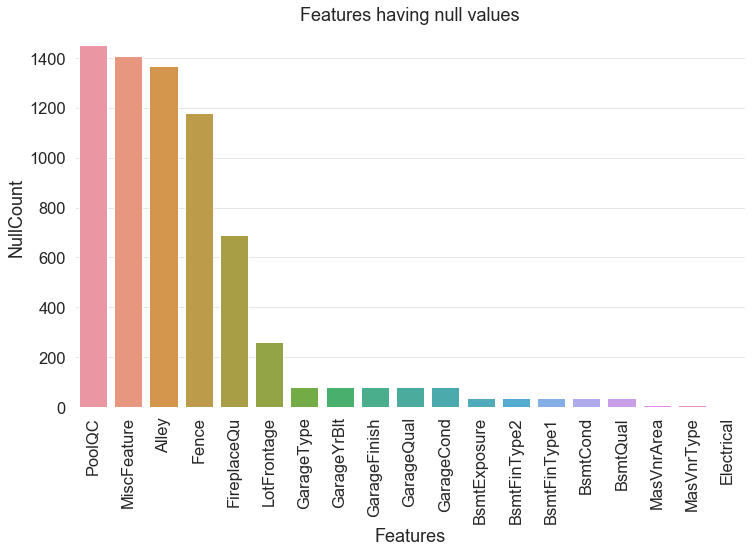

In [210]:
sns.barplot(data=df,x="Features",y="NullCount");
plt.xticks(rotation=90);
plt.title("Features having null values");

In [212]:
df

,Features,NullCount
16,PoolQC,1453
18,MiscFeature,1406
1,Alley,1369
17,Fence,1179
10,FireplaceQu,690
0,LotFrontage,259
11,GarageType,81
12,GarageYrBlt,81
13,GarageFinish,81
14,GarageQual,81


In [215]:
print (f"Number of features having null values: {df.shape[0]}")

Number of features having null values: 19


## <center> Features - Exploratory Data Analysis</center>

### SalePrice - Target Feature

In [261]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

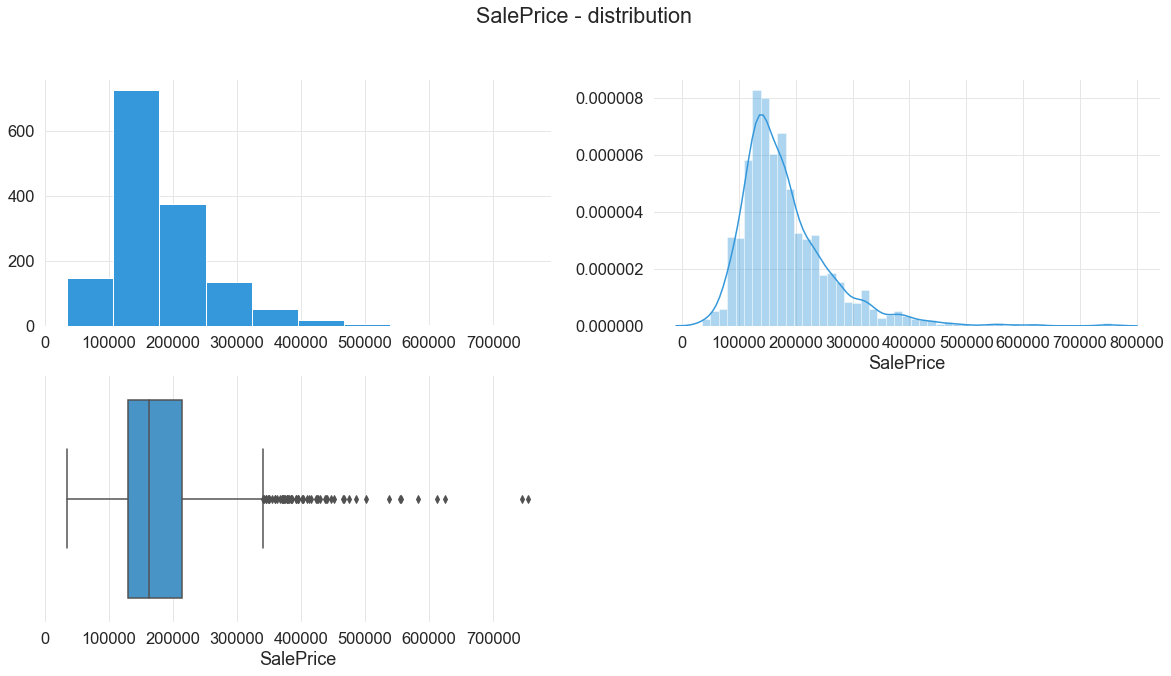

In [260]:
plt.figure(figsize=(20,10));
plt.subplot(2,2,1)
plt.hist(x=df_train.SalePrice);
plt.subplot(2,2,2)
sns.distplot(df_train.SalePrice);
plt.subplot(2,2,3)
sns.boxplot(df_train.SalePrice);
plt.suptitle("SalePrice - distribution");

In [258]:
print (f"Skewness in data : {df_train.SalePrice.skew()}")

Skewness in data : 1.8828757597682129


<h3 style='background-color:yellow'>
Continuous variable <br>
Positively skewed distribution.<br>
Presence of outliers.
</h3>

### 1. MSSubClass
Identifies the type of dwelling involved in the sale.<br>
 20	1-STORY 1946 & NEWER ALL STYLES<br>
        30	1-STORY 1945 & OLDER<br>
        40	1-STORY W/FINISHED ATTIC ALL AGES<br>
        45	1-1/2 STORY - UNFINISHED ALL AGES<br>
        50	1-1/2 STORY FINISHED ALL AGES<br>
        60	2-STORY 1946 & NEWER<br>
        70	2-STORY 1945 & OLDER<br>
        75	2-1/2 STORY ALL AGES<br>
        80	SPLIT OR MULTI-LEVEL<br>
        85	SPLIT FOYER<br>
        90	DUPLEX - ALL STYLES AND AGES<br>
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER<br>
       150	1-1/2 STORY PUD - ALL AGES<br>
       160	2-STORY PUD - 1946 & NEWER<br>
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER<br>
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES<br>

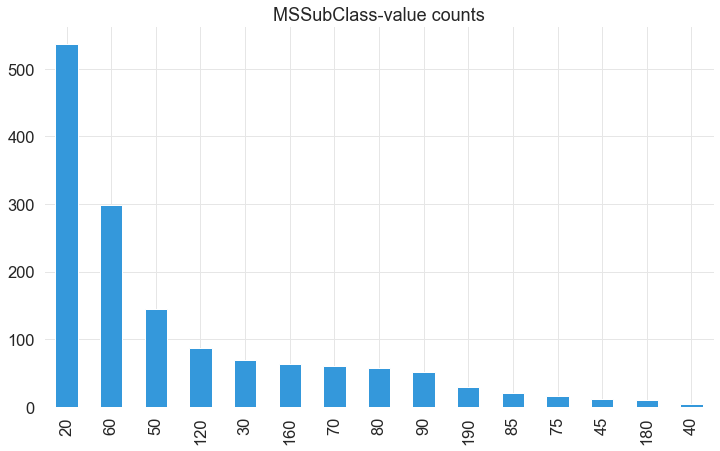

In [220]:
df_train.MSSubClass.value_counts().plot.bar();
plt.title("MSSubClass-value counts");

<h3 style='background-color:yellow'>
Categoical variable.
</h3>

### 2. MSZoning       
Identifies the general zoning classification of the sale.
    A	Agriculture <br>
       C	Commercial<br>
       FV	Floating Village Residential<br>
       I	Industrial<br>
       RH	Residential High Density<br>
       RL	Residential Low Density<br>
       RP	Residential Low Density Park <br>
       RM	Residential Medium Density<br>

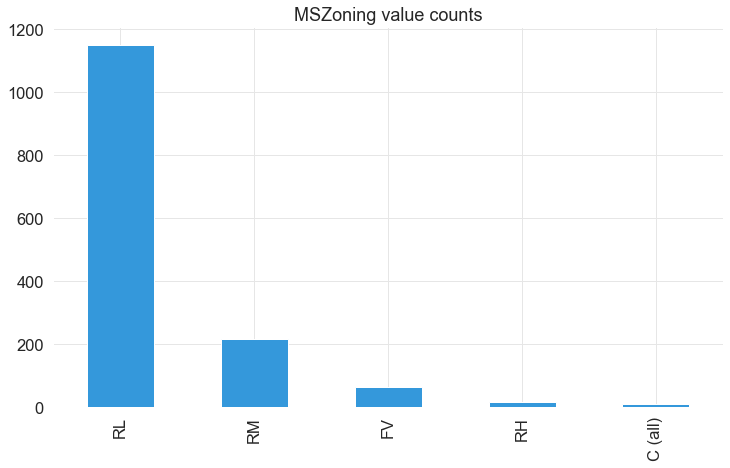

In [224]:
df_train.MSZoning.value_counts().plot.bar();
plt.title("MSZoning value counts");

<h3 style='background-color:yellow'>
Categorical variable.
</h3>

### 3. LotFrontage    
Linear feet of street connected to property

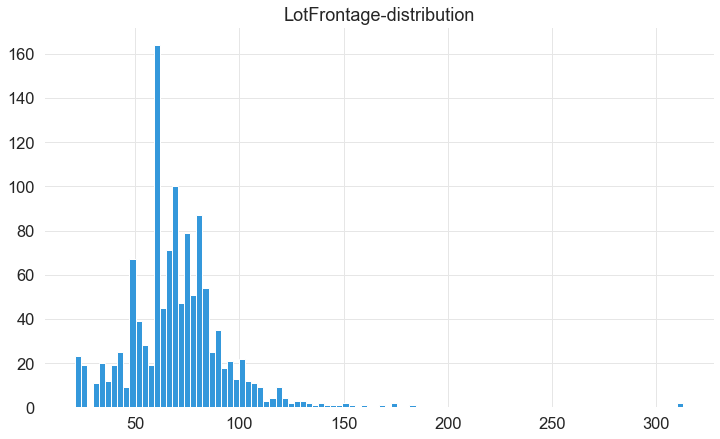

In [240]:
plt.hist(x=df_train.LotFrontage,bins=100);
plt.title("LotFrontage-distribution");

In [239]:
print ("Descriptive statistics:")
df_train.LotFrontage.describe()

Descriptive statistics:


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<h3 style='background-color:yellow'>
Continuous variable. <br>
Missing values present.
</h3>

## 4. LotArea
Lot size in square feet

In [262]:
df_train.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

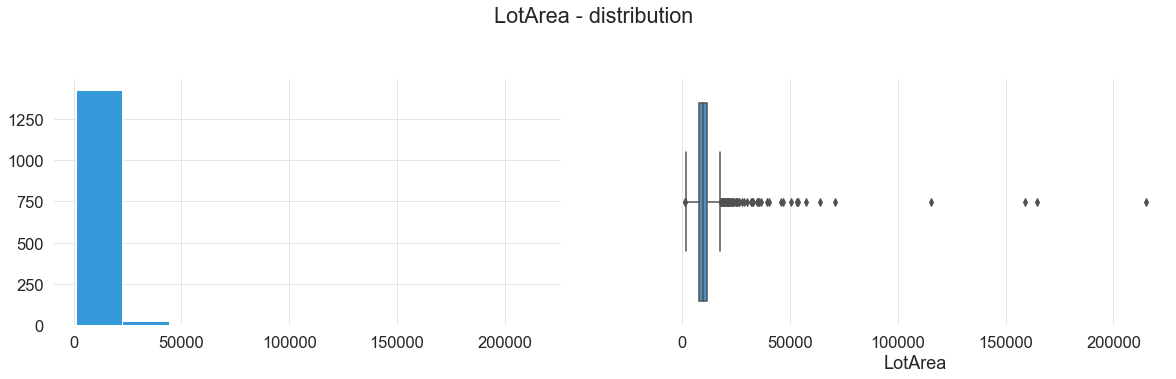

In [266]:
plt.figure(figsize=(20,10));
plt.subplot(2,2,1);
plt.hist(df_train.LotArea);
plt.subplot(2,2,2);
sns.boxplot(df_train.LotArea);
plt.suptitle("LotArea - distribution");

<h3 style='background-color:yellow'>
Continuous variable
</h3>

## 5. Street
Type of road access to property<br>
       Grvl	Gravel	<br>
       Pave	Paved

In [275]:
print (f"Unique values: \n")
np.unique(df_train.Street,return_counts=True)

Unique values: 



(array(['Grvl', 'Pave'], dtype=object), array([   6, 1454], dtype=int64))

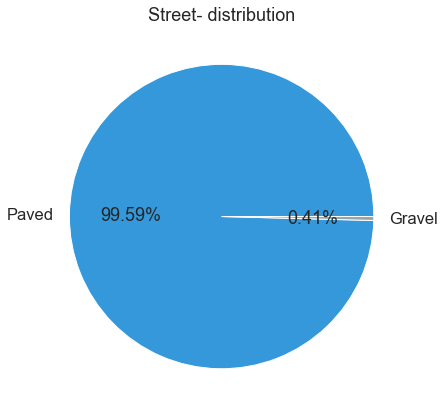

In [299]:
plt.pie(df_train.Street.value_counts(), autopct=lambda s: f'{s:.2f}%',labels=["Paved","Gravel"]);
plt.title("Street- distribution");

<h3 style='background-color:yellow'>
String Categorical variable. <br>
Almost  99% values are 'Paved'
</h3>

### 6. Alley
Type of alley access to property <br>
   Grvl	Gravel <br>
       Pave	Paved<br>
       NA 	No alley access<br>


In [285]:
print ("Value counts:\n")
df_train.Alley.value_counts()

Value counts:



Grvl    50
Pave    41
Name: Alley, dtype: int64

<h3 style='background-color:yellow'>
Categorical string values.<br>
Presence of Null values. <br>
Null/Missing value indicates 'No Alley Access'. <br>
Hence most of the observations having 'No Alley Access'.
</h3>

## 7. LotShape
General shape of property <br>

       Reg	Regular	 <br>
       IR1	Slightly irregular <br>
       IR2	Moderately Irregular<br>
       IR3	Irregular<br>

In [288]:
print ("Value counts:\n")
df_train.LotShape.value_counts()

Value counts:



Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

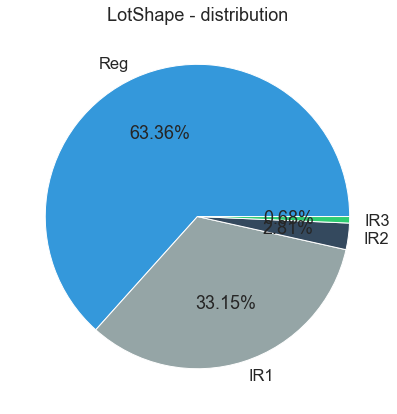

In [301]:
plt.pie(df_train.LotShape.value_counts(), autopct=lambda s: f'{s:.2f}%',labels=df_train.LotShape.value_counts().index);
plt.title("LotShape - distribution");

<h3 style='background-color:yellow'>
String categorical variable.
</h3>

## 8. LandContour    
 Flatness of the property

       Lvl	Near Flat/Level	 <br>
       Bnk	Banked - Quick and significant rise from street grade to building<br>
       HLS	Hillside - Significant slope from side to side<br>
       Low	Depression<br>

In [305]:
print ("Value counts:")
df_train.LandContour.value_counts()

Value counts:


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

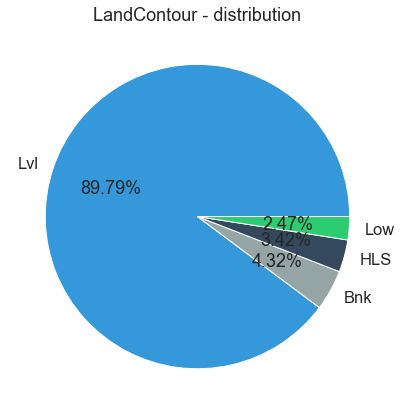

In [304]:
plt.pie(df_train.LandContour.value_counts(), autopct=lambda s: f'{s:.2f}%',labels=df_train.LandContour.value_counts().index);
plt.title("LandContour - distribution");

<h3 style='background-color:yellow'>
Categorical String variable
</h3>

## 9. Utilities
Type of utilities available <br>
  AllPub	All public Utilities (E,G,W,& S)	<br>
       NoSewr	Electricity, Gas, and Water (Septic Tank)<br>
       NoSeWa	Electricity and Gas Only<br>
       ELO	Electricity only<br>

In [306]:
print ("Value Counts:\n")
df_train.Utilities.value_counts()

Value Counts:



AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

<h3 style='background-color:yellow'>
Categorical String variable.
</h3>

## 10. LotConfig      
Lot configuration<br>

       Inside	Inside lot<br>
       Corner	Corner lot<br>
       CulDSac	Cul-de-sac<br>
       FR2	Frontage on 2 sides of property<br>
       FR3	Frontage on 3 sides of property<br>


In [309]:
print ("Value Counts:\n")
df_train.LotConfig.value_counts()

Value Counts:



Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

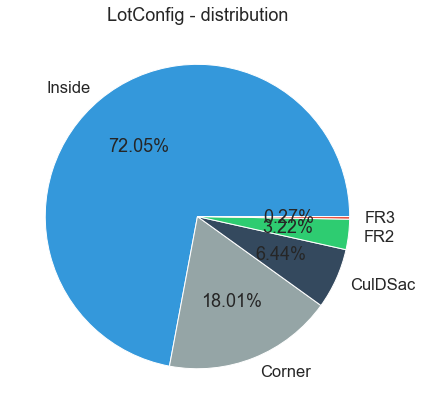

In [313]:
plt.pie(df_train.LotConfig.value_counts(),autopct=lambda s: f'{s:.2f}%',labels=df_train.LotConfig.value_counts().index);
plt.title("LotConfig - distribution");

<h3 style='background-color:yellow'>
String Categorical variable. <br>
</h3>

## 11. LandSlope 
Slope of property<br>
		
       Gtl	Gentle slope<br>
       Mod	Moderate Slope	<br>
       Sev	Severe Slope<br>

In [316]:
df_train.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

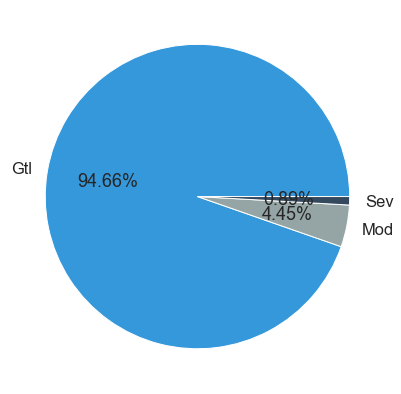

In [317]:
plt.pie(df_train.LandSlope.value_counts(),autopct=lambda s: f'{s:.2f}%',labels=df_train.LandSlope.value_counts().index);

<h3 style='background-color:yellow'>
String Categorical variable.
</h3>

## 12. Neighborhood   
Physical locations within Ames city limits<br>

       Blmngtn	Bloomington Heights<br>
       Blueste	Bluestem<br>
       BrDale	Briardale<br>
       BrkSide	Brookside<br>
       ClearCr	Clear Creek<br>
       CollgCr	College Creek<br>
       Crawfor	Crawford<br>
       Edwards	Edwards<br>
       Gilbert	Gilbert<br>
       IDOTRR	Iowa DOT and Rail Road<br>
       MeadowV	Meadow Village<br>
       Mitchel	Mitchell<br>
       Names	North Ames<br>
       NoRidge	Northridge<br>
       NPkVill	Northpark Villa<br>
       NridgHt	Northridge Heights<br>
       NWAmes	Northwest Ames<br>
       OldTown	Old Town<br>
       SWISU	South & West of Iowa State University<br>
       Sawyer	Sawyer<br>
       SawyerW	Sawyer West<br>
       Somerst	Somerset<br>
       StoneBr	Stone Brook<br>
       Timber	Timberland<br>
       Veenker	Veenker<br>

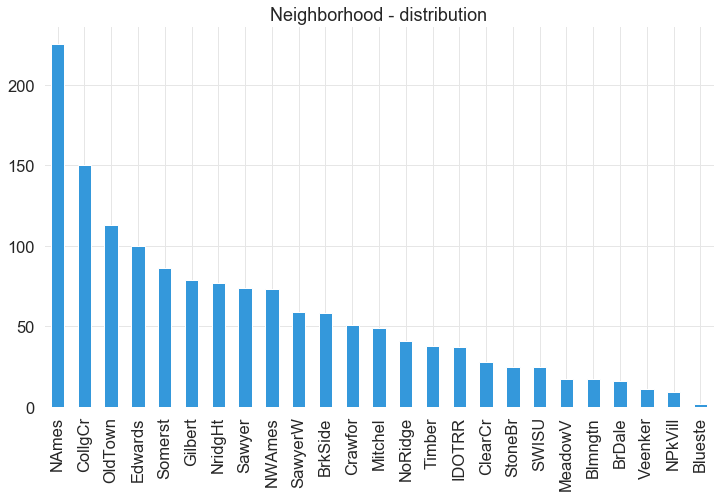

In [324]:
df_train.Neighborhood.value_counts().plot.bar();
plt.title("Neighborhood - distribution");

<h3 style='background-color:yellow'>
Categorical String variable.
</h3>